In [13]:
import numpy as np
import math

In [14]:
height = 1000
width = 1000
num_of_city = 13
city = []
dis = np.zeros((num_of_city, num_of_city), dtype=np.float16)
population = []
pop_size = 50
mutation_rate = 0.1

In [15]:
# dis = [
#         [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
#         [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
#         [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
#         [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
#         [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
#         [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
#         [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
#         [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
#         [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
#         [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
#         [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
#         [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
#         [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
#     ]

In [16]:
def distance(i,j):
    return math.sqrt((city[i].x-city[j].x)**2 + (city[i].y-city[j].y)**2)

def swap(a,b):
    return b,a

class City:
    def __init__(self) -> None:
        self.x = np.random.randint(0,width)
        self.y = np.random.randint(0,height)
        

class DNA:
    def __init__(self, dv=[]) -> None:
        if len(dv)==0:
            self.dvar = np.arange(num_of_city, dtype=np.int8)
            np.random.shuffle(self.dvar)
        else:
            self.dvar = dv
        self.fitness = 0
    
    def __str__(self) -> str:
        s = ''
        for i in range(num_of_city):
            s = s + str(self.dvar[i]) +  ' => '
        return  s

    def calc_fitness(self):
        for i in range(num_of_city-1):
            self.fitness = self.fitness + dis[self.dvar[i]][self.dvar[i+1]]
        self.fitness = self.fitness + dis[self.dvar[num_of_city-1]][self.dvar[0]]
        
    def draw(self):
        for i in range(num_of_city-1):
            line(city[self.dvar[i]].x, city[self.dvar[i]].y, city[self.dvar[i+1]].x, city[self.dvar[i+1]].y)

    def mutate(self):
        for i in range(num_of_city):
            if np.random.rand()<mutation_rate:
                id2 = np.random.randint(0, num_of_city)
                self.dvar[i], self.dvar[id2] = swap(self.dvar[i], self.dvar[id2])

def crossover(dna1, dna2):
    dv1 = dna1.dvar
    dv2 = dna2.dvar
    mid = np.random.randint(0, num_of_city)
    for i in range(mid):
        id = np.where(dv1==dv2[i])[0]
        dv1[id], dv1[i] = dv1[i], dv1[id]
        id = np.where(dv2==dv1[i])[0]
        dv2[id], dv2[i] = dv2[i], dv2[id]
    return DNA(dv=dv1), DNA(dv=dv2)

def init():
    for i in range(num_of_city):
        city.append(City())
    for i in range(num_of_city):
        for j in range(i,num_of_city):
            d = distance(i,j)
            dis[i][j] = d
            dis[j][i] = d
    for i in range(pop_size):
        population.append(DNA())
        population[i].calc_fitness()
        print(population[i].fitness)

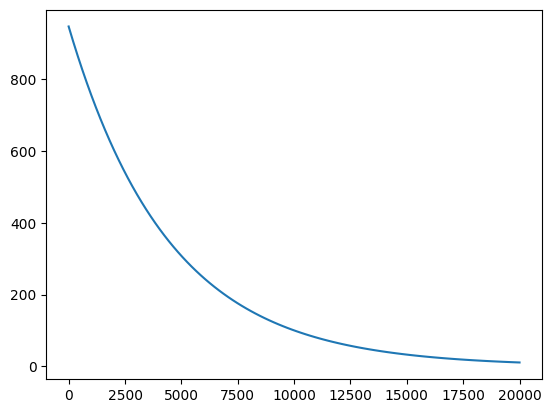

In [17]:

def fit_curve(x):
    return 100*pow(1.0015,-0.15*(x-10000))

import matplotlib.pyplot as plt
# Plot fitness curves
x = np.linspace(0,20000,100)
y = fit_curve(x)
plt.plot(x, y)

In [18]:
init()

5947.25
6896.5
6787.375
5634.625
6229.40625
6779.625
6295.25
6385.75
6459.0
6858.875
6650.5
6288.0
6087.25
6645.25
6692.125
6471.75
5616.625
6174.40625
6951.90625
5914.40625
6728.0
6539.0
7051.25
5970.125
7270.5
5524.28125
6521.0
7286.5
6225.75
7032.75
6302.125
6695.625
4778.78125
6526.875
6641.0
6220.25
7399.0
5711.53125
6112.125
5983.125
6754.75
5325.90625
6035.0
6651.875
6161.5
5689.5
6112.15625
5835.15625
5317.78125
6123.90625


In [21]:
dis2 = np.asarray(np.round(dis), dtype=np.int16)
dis2

array([[  0, 374, 556, 616, 446, 395, 296, 790, 832, 832, 297, 500, 340],
       [374,   0, 683, 578, 820, 616, 643, 786, 979, 992, 310, 586, 387],
       [556, 683,   0, 272, 675, 198, 455, 302, 297, 308, 374, 104, 297],
       [616, 578, 272,   0, 876, 405, 640, 209, 488, 512, 333, 198, 277],
       [446, 820, 675, 876,   0, 484, 237, 976, 832, 815, 656, 690, 650],
       [395, 616, 198, 405, 484,   0, 258, 493, 440, 438, 319, 210, 262],
       [296, 643, 455, 640, 237, 258,   0, 750, 658, 648, 431, 458, 417],
       [790, 786, 302, 209, 976, 493, 750,   0, 368, 399, 527, 300, 460],
       [832, 979, 297, 488, 832, 440, 658, 368,   0,  33, 671, 394, 594],
       [832, 992, 308, 512, 815, 438, 648, 399,  33,   0, 682, 408, 605],
       [297, 310, 374, 333, 656, 319, 431, 527, 671, 682,   0, 281,  78],
       [500, 586, 104, 198, 690, 210, 458, 300, 394, 408, 281,   0, 203],
       [340, 387, 297, 277, 650, 262, 417, 460, 594, 605,  78, 203,   0]],
      dtype=int16)

In [20]:
best_fit= math.inf
best_dna = DNA()

for it in range(1000):
    pool = []
    # population[0].draw()
    for i in range(pop_size):
        # population[i].draw()
        for j in range(math.floor(fit_curve(population[i].fitness))):
            pool.append(i)
    new_population = []
    for i in range(math.floor(pop_size/2)):
        dna1 = population[np.random.choice(pool)]
        dna2 = population[np.random.choice(pool)]
        dna1, dna2 = crossover(dna1, dna2)
        dna1.mutate()
        dna2.mutate()
        dna1.calc_fitness()
        dna2.calc_fitness()
        if best_fit > dna1.fitness:
            best_fit = dna1.fitness
            best_dna = dna1
        if best_fit > dna2.fitness:
            best_fit = dna2.fitness
            best_dna = dna2
        new_population.append(dna1)
        new_population.append(dna2)
    population = new_population
    print("best =", best_fit)
print(best_dna)
    

best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4901.53125
best = 4872.28125
best = 4816.03125
best = 4816.03125
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4599.90625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 4004.40625
best = 400